In [3]:
import networkx as nx
fb_graph = nx.read_edgelist("facebook_combined.txt")
print(f"Number of nodes: {fb_graph.number_of_nodes()}")
print(f"Number of edges: {fb_graph.number_of_edges()}")

Number of nodes: 4039
Number of edges: 88234


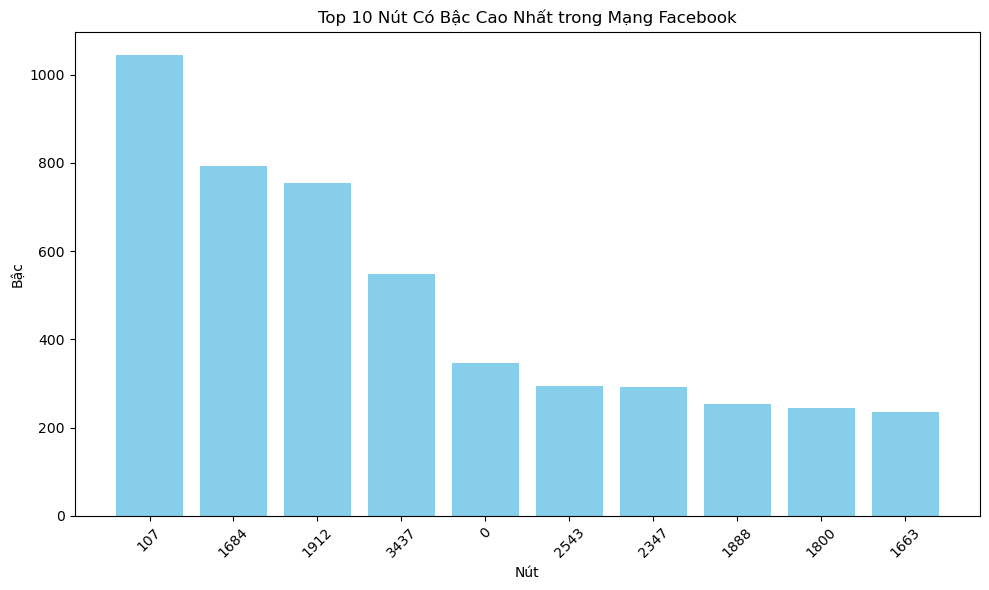

In [13]:
import matplotlib.pyplot as plt
fb_graph = nx.read_edgelist("facebook_combined.txt")
degrees = dict(fb_graph.degree())
sorted_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
top_10_nodes = sorted_nodes[:10]
nodes = [node for node, degree in top_10_nodes]
values = [degree for node, degree in top_10_nodes]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(nodes, values, color='skyblue')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title("Top 10 Nút Có Bậc Cao Nhất trong Mạng Facebook")
plt.xlabel("Nút")
plt.ylabel("Bậc")
plt.xticks(rotation=45)  # Xoay nhãn trên trục X cho dễ nhìn

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

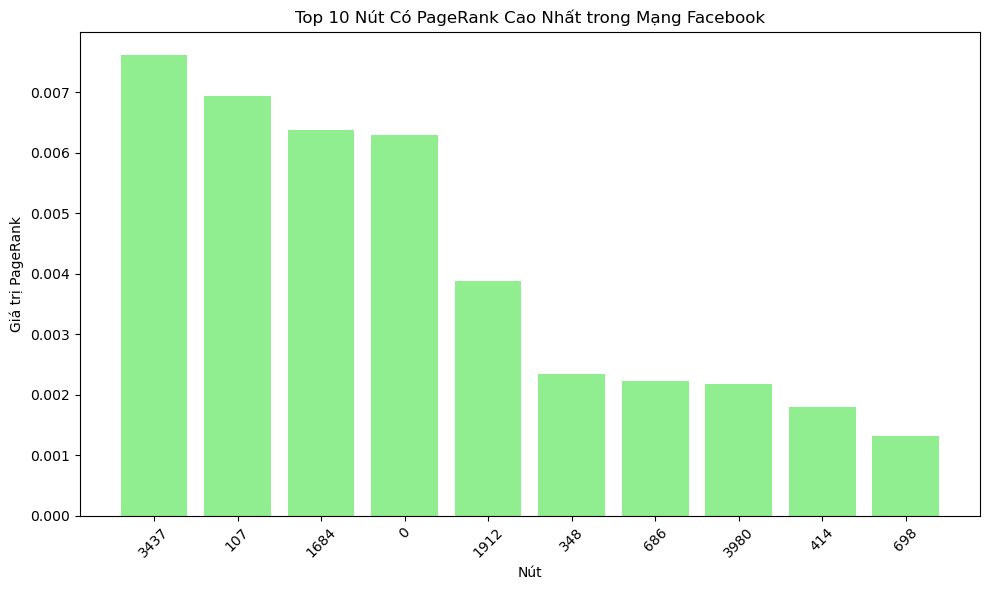

In [15]:
# Tính toán PageRank cho các nút trong mạng
pagerank_values = nx.pagerank(fb_graph, alpha=0.85)

# Sắp xếp các nút theo giá trị PageRank giảm dần
top_pagerank_nodes = sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True)[:10]

# Tách dữ liệu thành 2 danh sách: nút và giá trị PageRank
nodes = [node for node, pagerank in top_pagerank_nodes]
values = [pagerank for node, pagerank in top_pagerank_nodes]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(nodes, values, color='lightgreen')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title("Top 10 Nút Có PageRank Cao Nhất trong Mạng Facebook")
plt.xlabel("Nút")
plt.ylabel("Giá trị PageRank")
plt.xticks(rotation=45)  # Xoay nhãn trên trục X cho dễ nhìn

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [5]:
low_degree_nodes = [node for node, degree in fb_graph.degree() if degree < 2]
fb_graph.remove_nodes_from(low_degree_nodes)
print(f"Remaining nodes: {fb_graph.number_of_nodes()}")
print(f"Remaining edges: {fb_graph.number_of_edges()}")

Remaining nodes: 3964
Remaining edges: 88159


In [7]:
pagerank_values = nx.pagerank(fb_graph, alpha=0.85)
top_pagerank_nodes = sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes with highest PageRank:", top_pagerank_nodes)

Top 10 nodes with highest PageRank: [('3437', 0.007094003006939182), ('107', 0.00660135221190441), ('1684', 0.0062669282181505226), ('0', 0.0056255073329332704), ('1912', 0.003673837772871706), ('348', 0.002238661467672506), ('686', 0.002147251065717143), ('3980', 0.001686920427382001), ('414', 0.0014211107573101046), ('483', 0.0013021347719029501)]


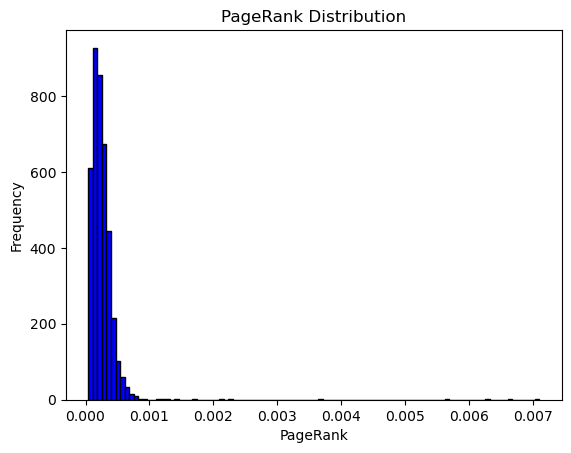

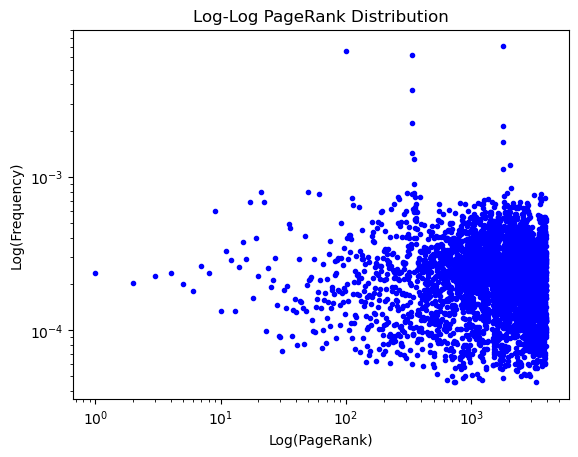

In [9]:
import matplotlib.pyplot as plt
plt.hist(list(pagerank_values.values()), bins=100, color='blue', edgecolor='black')
plt.title('PageRank Distribution')
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.show()
plt.loglog(list(pagerank_values.values()), 'bo', markersize=3)
plt.title('Log-Log PageRank Distribution')
plt.xlabel('Log(PageRank)')
plt.ylabel('Log(Frequency)')
plt.show()
